In [1]:
import qnetvo as qnet
from context import src
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [2]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex, game_names, use_game=False):

    game_tag = "_game_I_" if use_game else "_facet_I_"

    opt_dicts = []
    for game_name in game_names:


        file_regex = resource_regex + game_tag + game_name + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## Data Analysis

In [3]:
int_data_path = "../data/interference_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names)
eatx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names)
earx_qint_facet_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names)

qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"qint", game_names, use_game=True)
eatx_qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"eatx_qint", game_names, use_game=True)
earx_qint_game_opt_dicts = get_inequality_opt_dicts(int_data_path, r"earx_qint", game_names, use_game=True)

int2_data_path = "../data/interference2_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names)
eatx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names)
earx_qint2_facet_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names)

qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"qint", game_names, use_game=True)
eatx_qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"eatx_qint", game_names, use_game=True)
earx_qint2_game_opt_dicts = get_inequality_opt_dicts(int2_data_path, r"earx_qint", game_names, use_game=True)

bf_data_path = "../data/butterfly_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf", game_names)
qbf_cc_wings_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf_cc_wings", game_names)
eatx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"eatx_qbf", game_names)
earx_qbf_facet_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"earx_qbf", game_names)

qbf_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf", game_names, use_game=True)
qbf_cc_wings_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"qbf_cc_wings", game_names, use_game=True)
eatx_qbf_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"eatx_qbf", game_names, use_game=True)
earx_qbf_game_opt_dicts = get_inequality_opt_dicts(bf_data_path, r"earx_qbf", game_names, use_game=True)

# NOTE: hourglass was previously named min_bf (short for min butterfly). Legacy variable names are still used.
hg_data_path = "../data/hourglass_33_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]

min_qbf_facet_opt_dicts = get_inequality_opt_dicts(hg_data_path, r"qbf", game_names)
min_eatx_qbf_facet_opt_dicts = get_inequality_opt_dicts(hg_data_path, r"eatx_qbf", game_names)
min_earx_qbf_facet_opt_dicts = get_inequality_opt_dicts(hg_data_path, r"earx_qbf", game_names)

min_qbf_game_opt_dicts = get_inequality_opt_dicts(hg_data_path, r"qbf", game_names, use_game=True)
min_eatx_qbf_game_opt_dicts = get_inequality_opt_dicts(hg_data_path, r"eatx_qbf", game_names, use_game=True)
min_earx_qbf_game_opt_dicts = get_inequality_opt_dicts(hg_data_path, r"earx_qbf", game_names, use_game=True)

mac_data_path = "../data/mac_33_9_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]
qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"qmac", game_names)
eatx_qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"eatx_qmac", game_names)
ghza_qmac_facet_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"ghza_qmac", game_names, use_game=True)

qmac_game_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"qmac", game_names, use_game=True)
eatx_qmac_game_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"eatx_qmac", game_names, use_game=True)
ghza_qmac_game_opt_dicts = get_inequality_opt_dicts(mac_data_path, r"ghza_qmac", game_names, use_game=True)

bc_data_path = "../data/broadcast_9_33_network_violations/"
game_names = ["mult0", "mult1", "swap", "adder", "compare", "perm", "diff", "cv"]
qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"qbc", game_names)
earx_qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"earx_qbc", game_names)
gea_qbc_facet_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"gea_qbc", game_names)

qbc_game_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"qbc", game_names, use_game=True)
earx_qbc_game_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"earx_qbc", game_names, use_game=True)
gea_qbc_game_opt_dicts = get_inequality_opt_dicts(bc_data_path, r"gea_qbc", game_names, use_game=True)




## Analyzing Data

In [4]:
interference_game_inequalities, interference_facet_inequalities, interference_game_names = src.interference_33_33_network_bounds()
interference2_game_inequalities, interference2_facet_inequalities, interference2_game_names = src.interference2_33_33_network_bounds()
butterfly_game_inequalities, butterfly_facet_inequalities, butterfly_game_names = src.butterfly_33_33_network_bounds()
hourglass_game_inequalities, hourglass_facet_inequalities, hourglass_game_names = src.hourglass_33_33_network_bounds()

mac_game_inequalities, mac_facet_inequalities, mac_game_names = src.mac_33_22_9_network_bounds()
bc_game_inequalities, bc_facet_inequalities, bc_game_names = src.broadcast_9_22_33_network_bounds()



def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(game_opt_dicts)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(9):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]

        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound)/ (qbound - cbound)]
        

    return max_violations, qbounds, cbounds

print(interference_game_names)
qint_facet_max_violations, qint_facet_qbounds, qint_facet_cbounds = analyze_data(qint_facet_opt_dicts, interference_facet_inequalities)
eatx_qint_facet_max_violations, eatx_qint_facet_qbounds, eatx_qint_facet_cbounds = analyze_data(eatx_qint_facet_opt_dicts, interference_facet_inequalities)
earx_qint_facet_max_violations, earx_qint_facet_qbounds, earx_qint_facet_cbounds = analyze_data(earx_qint_facet_opt_dicts, interference_facet_inequalities)

qint_game_max_violations, qint_game_qbounds, qint_game_cbounds = analyze_data(qint_game_opt_dicts, interference_game_inequalities)
eatx_qint_game_max_violations, eatx_qint_game_qbounds, eatx_qint_game_cbounds = analyze_data(eatx_qint_game_opt_dicts, interference_game_inequalities)
earx_qint_game_max_violations, earx_qint_game_qbounds, earx_qint_game_cbounds = analyze_data(earx_qint_game_opt_dicts, interference_game_inequalities)


qint2_facet_max_violations, qint2_facet_qbounds, qint2_facet_cbounds = analyze_data(qint2_facet_opt_dicts, interference2_facet_inequalities)
eatx_qint2_facet_max_violations, eatx_qint2_facet_qbounds, eatx_qint2_facet_cbounds = analyze_data(eatx_qint2_facet_opt_dicts, interference2_facet_inequalities)
earx_qint2_facet_max_violations, earx_qint2_facet_qbounds, earx_qint2_facet_cbounds = analyze_data(earx_qint2_facet_opt_dicts, interference2_facet_inequalities)

qint2_game_max_violations, qint2_game_qbounds, qint2_game_cbounds = analyze_data(qint2_game_opt_dicts, interference2_game_inequalities)
eatx_qint2_game_max_violations, eatx_qint2_game_qbounds, eatx_qint2_game_cbounds = analyze_data(eatx_qint2_game_opt_dicts, interference2_game_inequalities)
earx_qint2_game_max_violations, earx_qint2_game_qbounds, earx_qint2_game_cbounds = analyze_data(earx_qint2_game_opt_dicts, interference2_game_inequalities)



qbf_facet_max_violations, qbf_facet_qbounds, qbf_facet_cbounds = analyze_data(qbf_facet_opt_dicts,  butterfly_facet_inequalities)
qbf_cc_wings_facet_max_violations, qbf_cc_wings_facet_qbounds, qbf_cc_wings_facet_cbounds = analyze_data(qbf_cc_wings_facet_opt_dicts,  butterfly_facet_inequalities)
eatx_qbf_facet_max_violations, eatx_qbf_facet_qbounds, eatx_qbf_facet_cbounds = analyze_data(eatx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)
earx_qbf_facet_max_violations, earx_qbf_facet_qbounds, earx_qbf_facet_cbounds = analyze_data(earx_qbf_facet_opt_dicts,  butterfly_facet_inequalities)

qbf_game_max_violations, qbf_game_qbounds, qbf_game_cbounds = analyze_data(qbf_game_opt_dicts,  butterfly_game_inequalities)
qbf_cc_wings_game_max_violations, qbf_cc_wings_game_qbounds, qbf_cc_wings_game_cbounds = analyze_data(qbf_cc_wings_game_opt_dicts,  butterfly_game_inequalities)
eatx_qbf_game_max_violations, eatx_qbf_game_qbounds, eatx_qbf_game_cbounds = analyze_data(eatx_qbf_game_opt_dicts,  butterfly_game_inequalities)
earx_qbf_game_max_violations, earx_qbf_game_qbounds, earx_qbf_game_cbounds = analyze_data(earx_qbf_game_opt_dicts,  butterfly_game_inequalities)

min_qbf_facet_max_violations, min_qbf_facet_qbounds, min_qbf_facet_cbounds = analyze_data(min_qbf_facet_opt_dicts,  hourglass_facet_inequalities)
min_eatx_qbf_facet_max_violations, min_eatx_qbf_facet_qbounds, min_eatx_qbf_facet_cbounds = analyze_data(min_eatx_qbf_facet_opt_dicts,  hourglass_facet_inequalities)
min_earx_qbf_facet_max_violations, min_earx_qbf_facet_qbounds, min_earx_qbf_facet_cbounds = analyze_data(min_earx_qbf_facet_opt_dicts,  hourglass_facet_inequalities)

min_qbf_game_max_violations, min_qbf_game_qbounds, min_qbf_game_cbounds = analyze_data(min_qbf_game_opt_dicts,  hourglass_game_inequalities)
min_eatx_qbf_game_max_violations, min_eatx_qbf_game_qbounds, min_eatx_qbf_game_cbounds = analyze_data(min_eatx_qbf_game_opt_dicts,  hourglass_game_inequalities)
min_earx_qbf_game_max_violations, min_earx_qbf_game_qbounds, min_earx_qbf_game_cbounds = analyze_data(min_earx_qbf_game_opt_dicts,  hourglass_game_inequalities)




qmac_facet_max_violations, qmac_facet_qbounds, qmac_facet_cbounds = analyze_data(qmac_facet_opt_dicts, mac_facet_inequalities)
eatx_qmac_facet_max_violations, eatx_qmac_facet_qbounds, eatx_qmac_facet_cbounds = analyze_data(eatx_qmac_facet_opt_dicts, mac_facet_inequalities)
ghza_qmac_facet_max_violations, ghza_qmac_facet_qbounds, ghza_qmac_facet_cbounds = analyze_data(ghza_qmac_facet_opt_dicts, mac_facet_inequalities)

qmac_game_max_violations, qmac_game_qbounds, qmac_game_cbounds = analyze_data(qmac_game_opt_dicts, mac_game_inequalities)
eatx_qmac_game_max_violations, eatx_qmac_game_qbounds, eatx_qmac_game_cbounds = analyze_data(eatx_qmac_game_opt_dicts, mac_game_inequalities)
ghza_qmac_game_max_violations, ghza_qmac_game_qbounds, ghza_qmac_game_cbounds = analyze_data(ghza_qmac_game_opt_dicts, mac_game_inequalities)

qbc_facet_max_violations, qbc_facet_qbounds, qbc_facet_cbounds = analyze_data(qbc_facet_opt_dicts, bc_facet_inequalities)
earx_qbc_facet_max_violations, earx_qbc_facet_qbounds, earx_qbc_facet_cbounds = analyze_data(earx_qbc_facet_opt_dicts, bc_facet_inequalities)
gea_qbc_facet_max_violations, gea_qbc_facet_qbounds, gea_qbc_facet_cbounds = analyze_data(gea_qbc_facet_opt_dicts, bc_facet_inequalities)

qbc_game_max_violations, qbc_game_qbounds, qbc_game_cbounds = analyze_data(qbc_game_opt_dicts, bc_game_inequalities)
earx_qbc_game_max_violations, earx_qbc_game_qbounds, earx_qbc_game_cbounds = analyze_data(earx_qbc_game_opt_dicts, bc_game_inequalities)
gea_qbc_game_max_violations, gea_qbc_game_qbounds, gea_qbc_game_cbounds = analyze_data(gea_qbc_game_opt_dicts, bc_game_inequalities)


['mult0', 'mult1', 'swap', 'adder', 'compare', 'perm', 'diff', 'cv']


In [5]:
x_axis = np.arange(len(interference_game_names))
x_labels = interference_game_names
x_labels = ["Mult-0", "Mult-1", "Swap", "Add", "Comp", "Perm", "Diff", "CV"]
x_labels_games = [
    r"$\mathbf{V}^{\times_0}$",
    r"$\mathbf{V}^{\times_1}$",
    r"$\mathbf{V}^{\leftrightarrow}$",
    r"$\mathbf{V}^{+}$",
    r"$\mathbf{V}^{\gtrless}$",
    r"$\mathbf{V}^{\pi}$",
    r"$\mathbf{V}^{-}$",
    r"$\mathbf{V}^{\rm{CV}}$",
]
x_labels_facets = [
    r"$\mathbf{F}^{\times_0}$",
    r"$\mathbf{F}^{\times_1}$",
    r"$\mathbf{F}^{\leftrightarrow}$",
    r"$\mathbf{F}^{+}$",
    r"$\mathbf{F}^{\gtrless}$",
    r"$\mathbf{F}^{\pi}$",
    r"$\mathbf{F}^{-}$",
    r"$\mathbf{F}^{\rm{CV}}$",
]


0.9999370203904911
[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[7, 5, 4, 5, 6, 4, 7, 4]


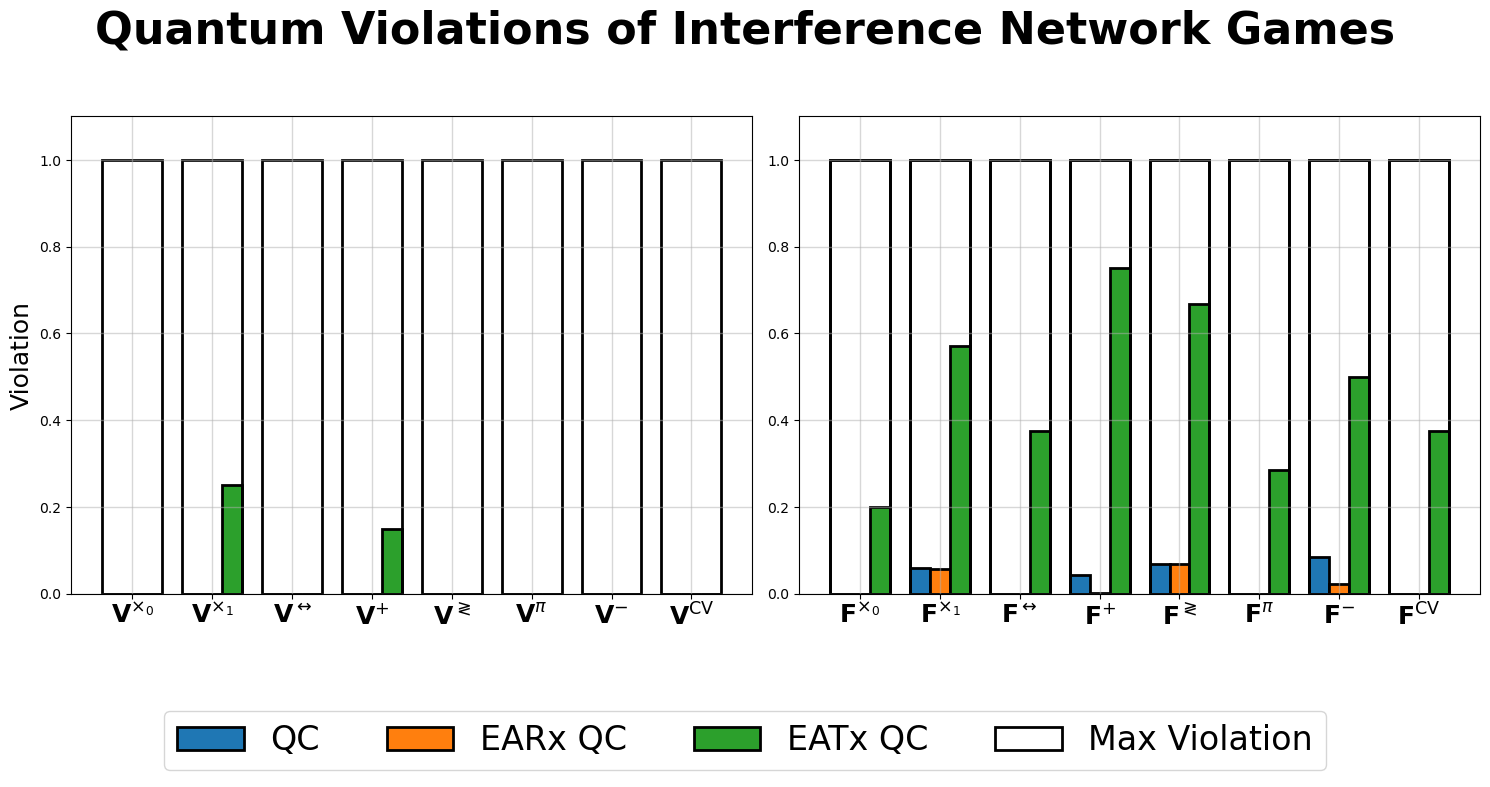

In [6]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)

print(eatx_qint_game_max_violations[1]*4)
print(eatx_qint_game_qbounds)
print(eatx_qint_game_cbounds)


ax1.bar(x_axis-1*width, qint_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qint_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qint_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qint_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qint_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

-1.6553123280615976e-05
[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[7, 4, 2, 5, 6, 2, 7, 2]


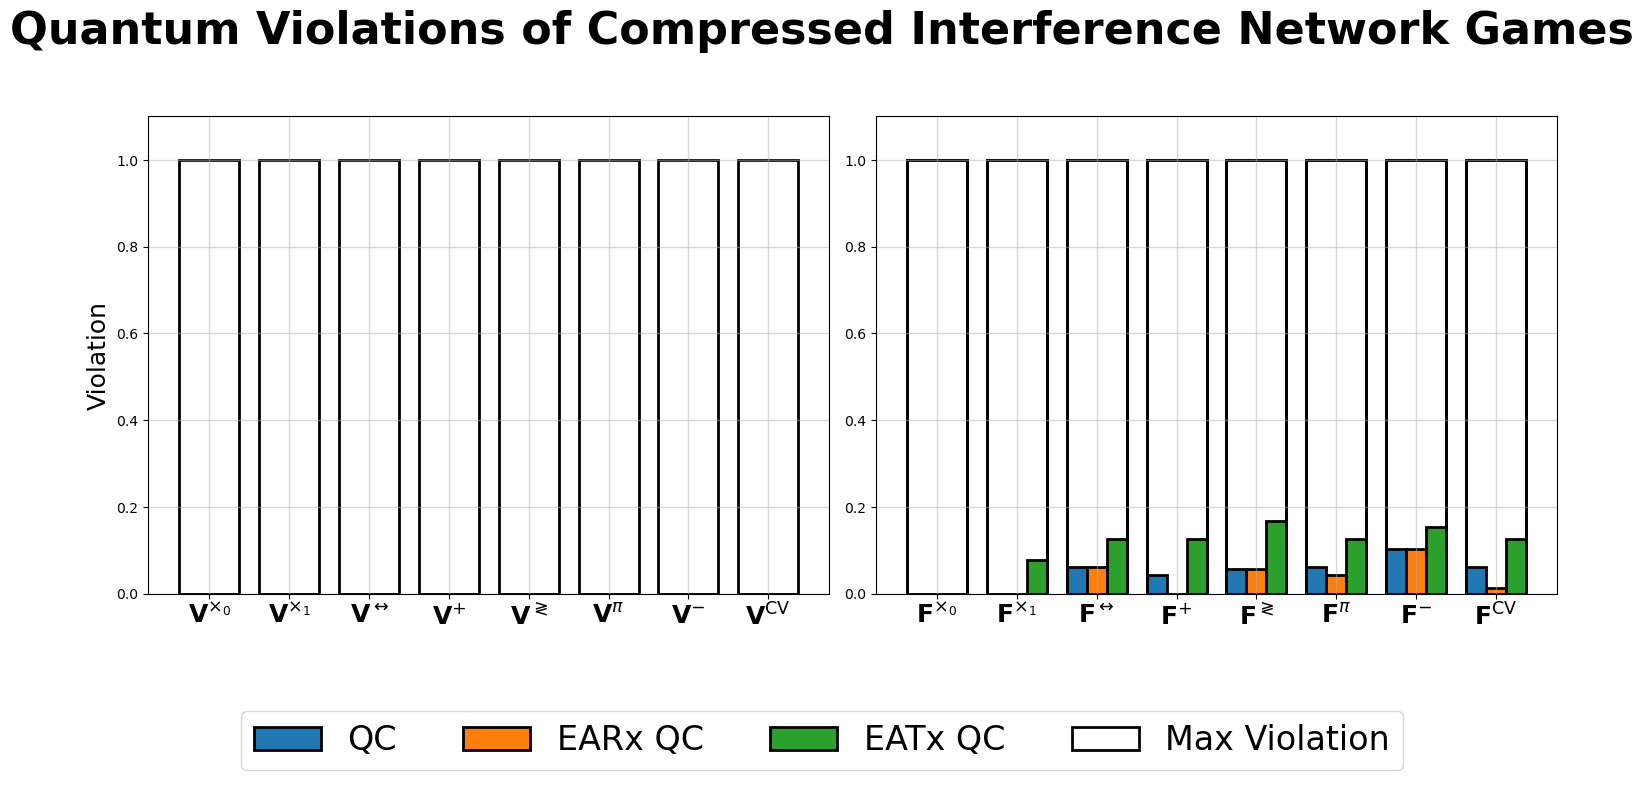

In [7]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)

print(eatx_qint2_game_max_violations[1]*4)
print(eatx_qint2_game_qbounds)
print(eatx_qint2_game_cbounds)


ax1.bar(x_axis-1*width, qint2_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qint2_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qint2_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qint2_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qint2_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qint2_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Compressed Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

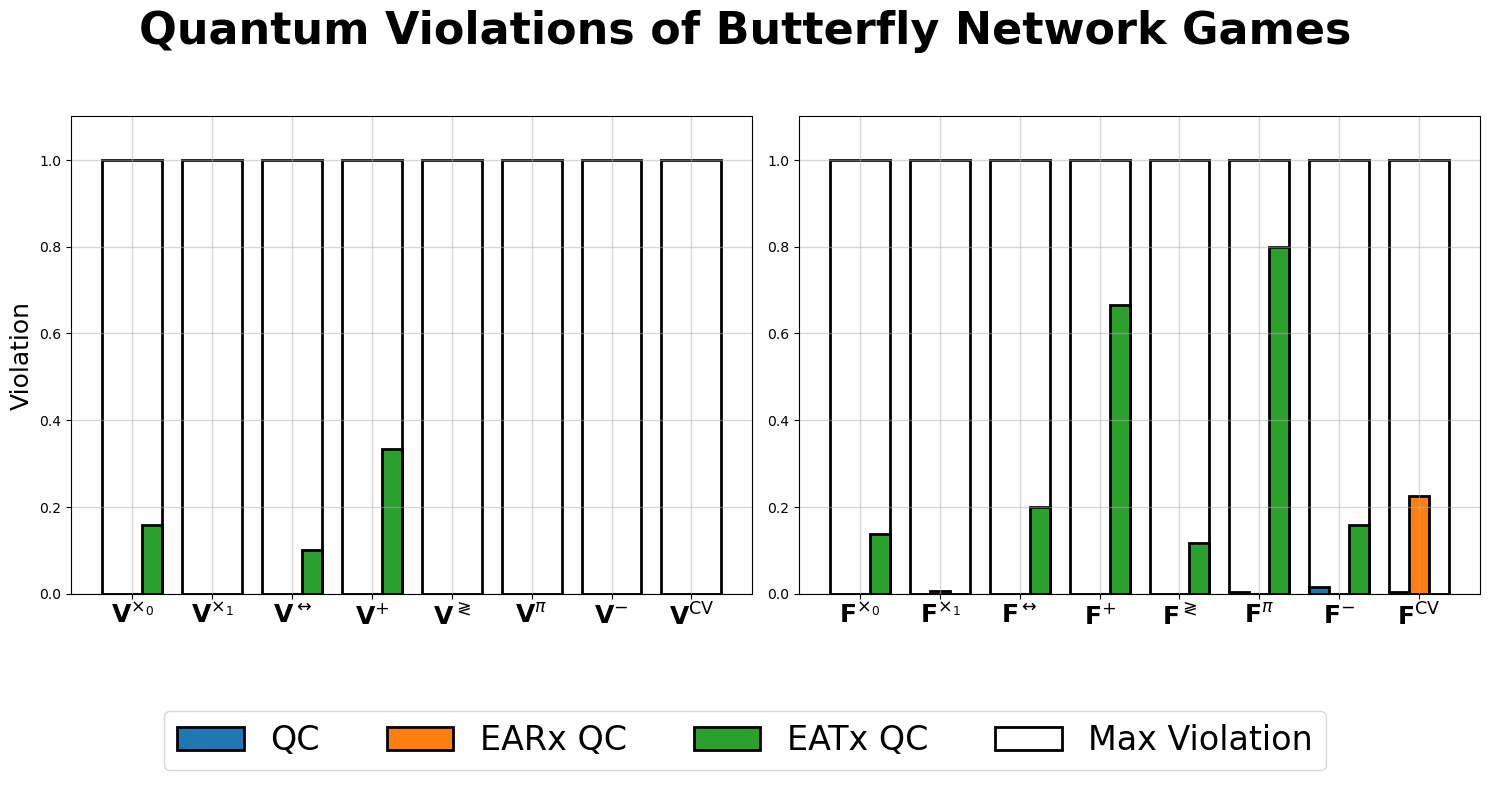

In [8]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, qbf_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qbf_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, eatx_qbf_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qbf_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qbf_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, eatx_qbf_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Butterfly Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

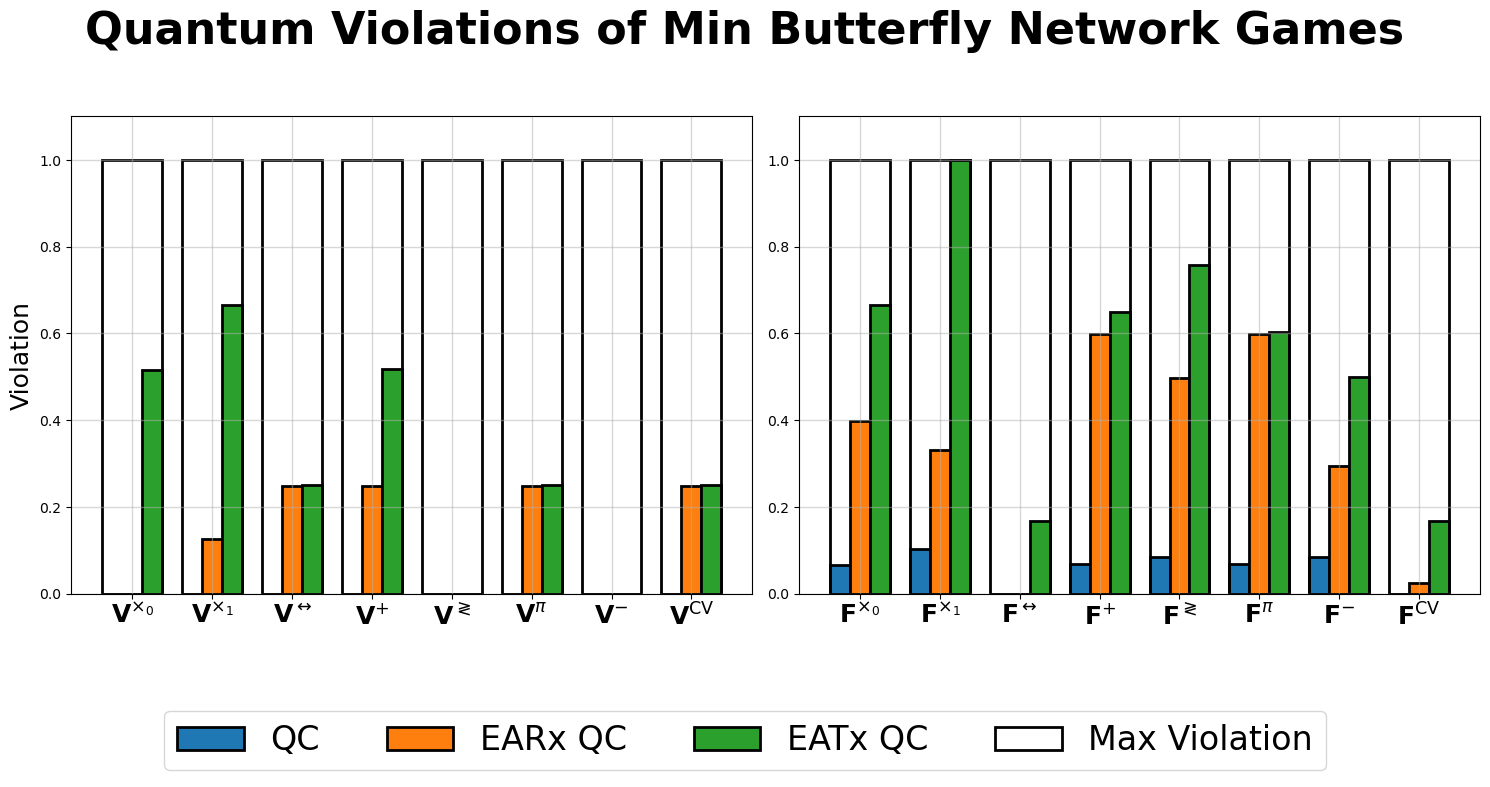

In [9]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, min_qbf_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, min_earx_qbf_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, min_eatx_qbf_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, min_qbf_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, min_earx_qbf_facet_max_violations, width=width, label="EARX QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, min_eatx_qbf_facet_max_violations, width=width, label="EATX QC", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, qbf_cc_wings_game_max_violations, width=width, label="QC CCWings", edgecolor="black",linewidth=2)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of Min Butterfly Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

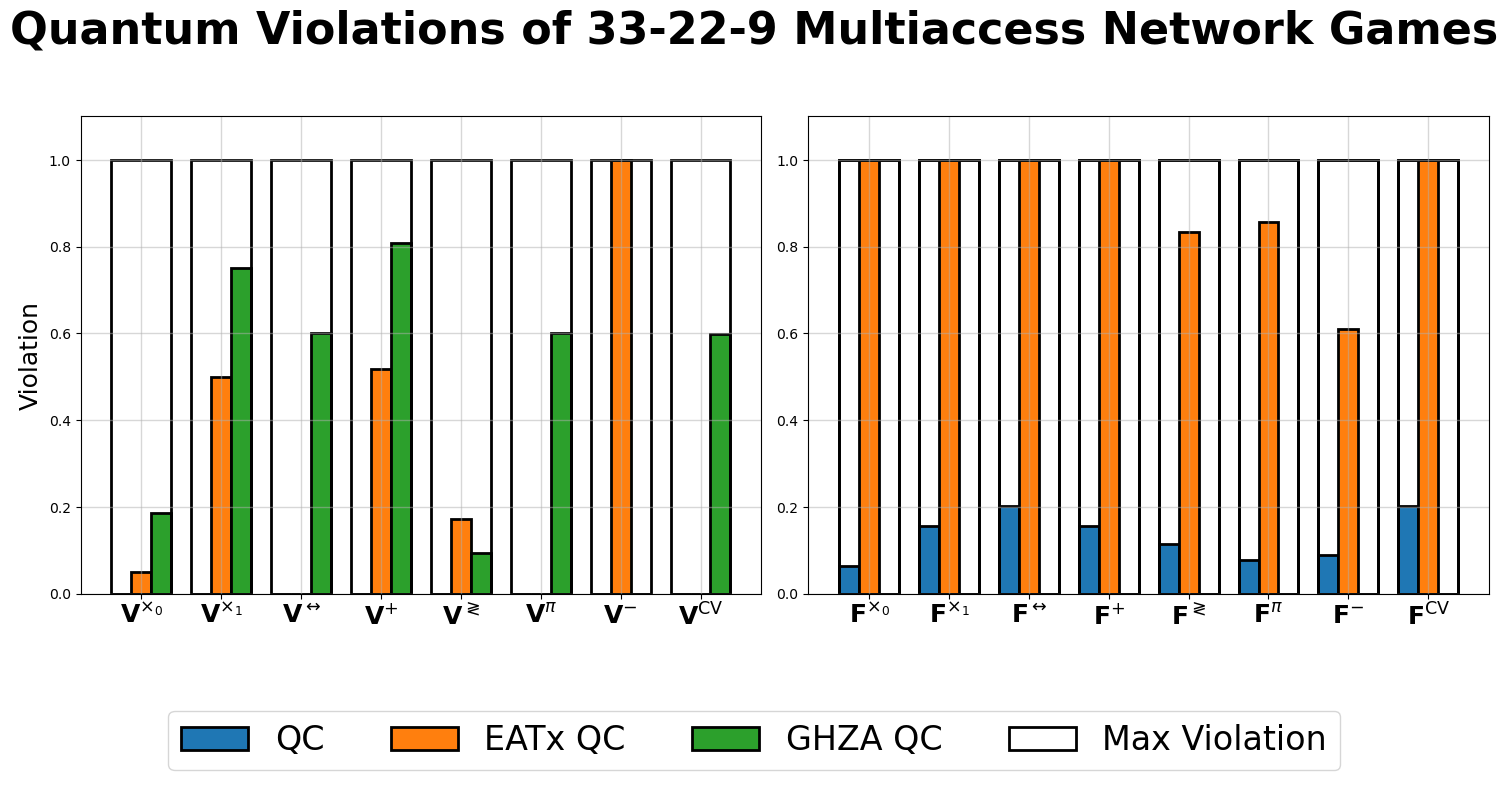

In [10]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, qmac_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, eatx_qmac_game_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, ghza_qmac_game_max_violations, width=width, label="GHZA QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qmac_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, eatx_qmac_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, ghza_qmac_facet_max_violations, width=width, label="GHZA QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)



# ax2.bar(x_axis-1*width, qint_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis-0*width, eatx_qint_facet_max_violations, width=width, label="EATx QC", edgecolor="black",linewidth=2)
# ax2.bar(x_axis+1*width, earx_qint_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(interference_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)
# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Quantum Violations of 33-22-9 Multiaccess Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

## Broadcast Plot

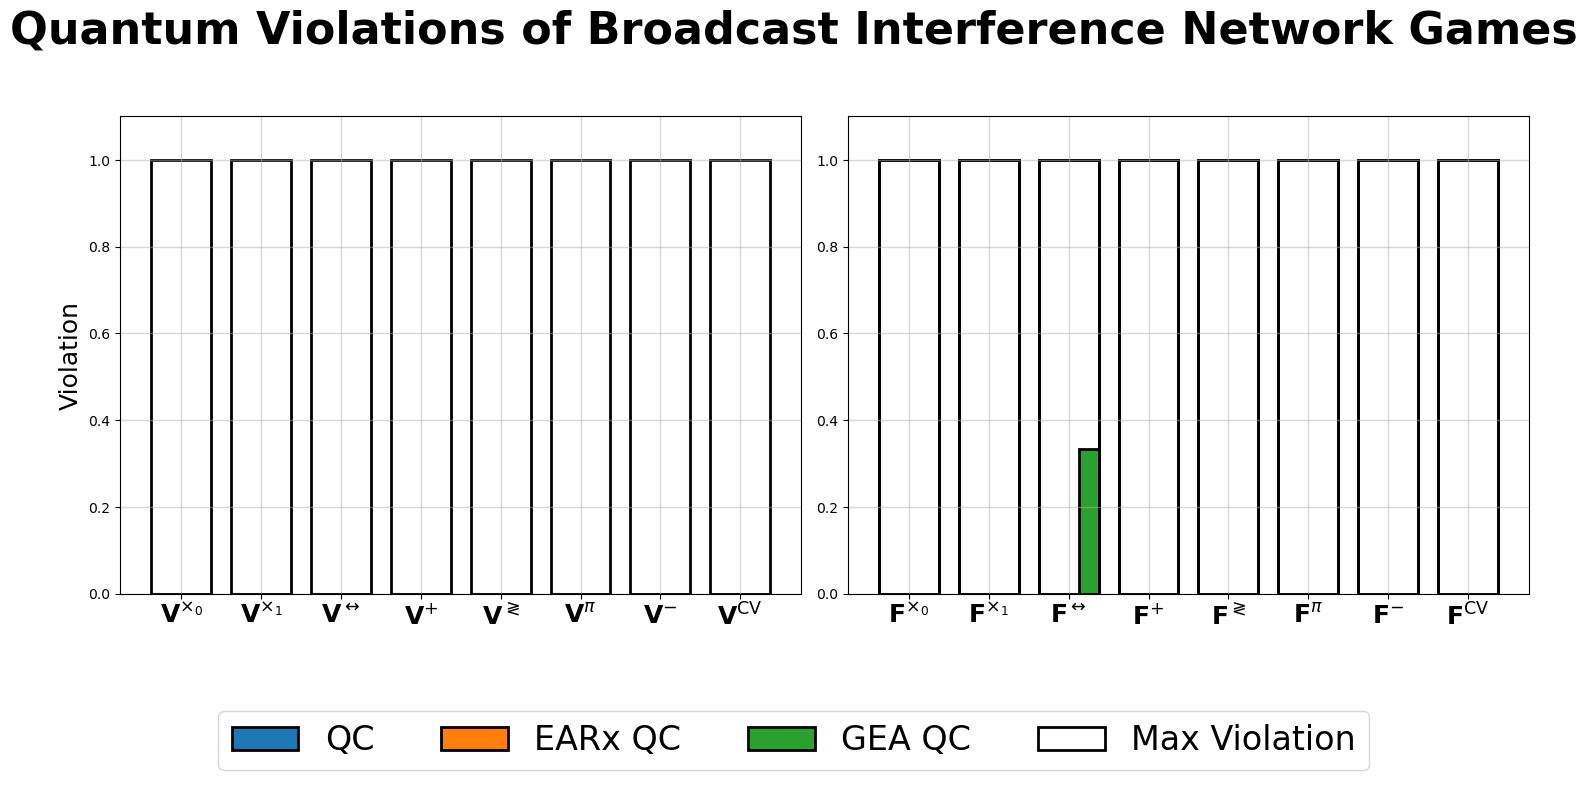

In [11]:
width = 1/4

fig, (ax1, ax2) = plt.subplots(figsize=(15, 8), ncols=2,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)
ax2.grid(linewidth=1, alpha=0.5)


ax1.bar(x_axis-1*width, qbc_game_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qbc_game_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+1*width, gea_qbc_game_max_violations, width=width, label="GEA QC", edgecolor="black",linewidth=2)


ax1.bar(x_axis+0*width, np.ones(len(bc_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


plt.figlegend(loc="lower center", ncols = 6, fontsize=24)

ax2.bar(x_axis-1*width, qbc_facet_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+0*width, earx_qbc_facet_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)
ax2.bar(x_axis+1*width, gea_qbc_facet_max_violations, width=width, label="GEA QC", edgecolor="black",linewidth=2)

ax2.bar(x_axis+0*width, np.ones(len(bc_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)


ax2.bar(x_axis+0*width, np.ones(len(bc_game_names)), width=1-width,  label="Max Violation", edgecolor="black", linewidth=2, fill=False)

ax1.set_xticks(x_axis, x_labels_games, fontsize=18)
ax1.set_ylabel("Violation", fontsize=18)

ax2.set_xticks(x_axis, x_labels_facets, fontsize=18)


fig.suptitle("Quantum Violations of Broadcast Interference Network Games\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)


plt.show()

## Global ANalysis

In [44]:
def print_max_violations_table(
    network_names,qc_max_violations,eatx_max_violations,earx_max_violations, game_names, network_cbounds, network_qbounds, is_game=True,
):
    table = [["Networks \ Games"] + game_names]
    for i, network_name in enumerate(network_names):
        table += [[network_name]]
        for j, game_name in enumerate(game_names):

            unscale = lambda scaled_score, cbound, qbound: scaled_score * (qbound - cbound) + cbound

            cbound = network_cbounds[i][j] if is_game else 0
            qc_violation = unscale(qc_max_violations[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else qc_max_violations[i][j]
            earx_qc_violation = unscale(earx_max_violations[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else earx_max_violations[i][j]
            eatx_qc_violation = unscale(eatx_max_violations[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else eatx_max_violations[i][j]
            qbound = unscale(network_qbounds[i][j], network_cbounds[i][j], network_qbounds[i][j]) if is_game else network_qbounds[i][j]

            table[i+1] += [(cbound, qc_violation, earx_qc_violation, eatx_qc_violation, qbound)]

    return table


network_names = ["IF", "CIF", "BF", "HG", "MA", "BC"]


network_max_facet_qc_violations = [
    qint_facet_max_violations,
    qint2_facet_max_violations,
    qbf_facet_max_violations,
    min_qbf_facet_max_violations,
    qmac_facet_max_violations,
    qbc_facet_max_violations,
]
network_max_facet_eatx_qc_violations = [
    eatx_qint_facet_max_violations,
    eatx_qint2_facet_max_violations,
    eatx_qbf_facet_max_violations,
    min_eatx_qbf_facet_max_violations,
    eatx_qmac_facet_max_violations,
    [0]  * len(qbc_facet_max_violations),
]

network_max_facet_earx_qc_violations = [
    earx_qint_facet_max_violations,
    earx_qint2_facet_max_violations,
    earx_qbf_facet_max_violations,
    min_earx_qbf_facet_max_violations,
    [0] * len(qmac_facet_max_violations),
    earx_qbc_facet_max_violations,
]

network_facet_qbounds = [
    qint_facet_qbounds,
    qint2_facet_qbounds,
    qbf_facet_qbounds,
    min_qbf_facet_qbounds,
    qmac_facet_qbounds,
    qbc_facet_qbounds,
]
network_facet_cbounds = [
    qint_facet_cbounds,
    qint2_facet_cbounds,
    qbf_facet_cbounds,
    min_qbf_facet_cbounds,
    qmac_facet_cbounds,
    qbc_facet_cbounds,
]

network_max_game_qc_violations = [
    qint_game_max_violations,
    qint2_game_max_violations,
    qbf_game_max_violations,
    min_qbf_game_max_violations,
    qmac_game_max_violations,
    qbc_game_max_violations,
]
network_max_game_eatx_qc_violations = [
    eatx_qint_game_max_violations,
    eatx_qint2_game_max_violations,
    eatx_qbf_game_max_violations,
    min_eatx_qbf_game_max_violations,
    eatx_qmac_game_max_violations,
    [0] * len(qbc_game_max_violations),
]

network_max_game_earx_qc_violations = [
    earx_qint_game_max_violations,
    earx_qint2_game_max_violations,
    earx_qbf_game_max_violations,
    min_earx_qbf_game_max_violations,
    [0] * len(qmac_game_max_violations),
    earx_qbc_game_max_violations,
]

network_game_qbounds = [
    qint_game_qbounds,
    qint2_game_qbounds,
    qbf_game_qbounds,
    min_qbf_game_qbounds,
    qmac_game_qbounds,
    qbc_game_qbounds,
]
network_game_cbounds = [
    qint_game_cbounds,
    qint2_game_cbounds,
    qbf_game_cbounds,
    min_qbf_game_cbounds,
    qmac_game_cbounds,
    qbc_game_cbounds,
]



# qmac_facet_max_violations, qmac_facet_qbounds, qmac_facet_cbounds = analyze_data(qmac_facet_opt_dicts, mac_facet_inequalities)
# eatx_qmac_facet_max_violations, eatx_qmac_facet_qbounds, eatx_qmac_facet_cbounds = analyze_data(eatx_qmac_facet_opt_dicts, mac_facet_inequalities)


# qbc_facet_max_violations, qbc_facet_qbounds, qbc_facet_cbounds = analyze_data(qbc_facet_opt_dicts, bc_facet_inequalities)
# earx_qbc_facet_max_violations, earx_qbc_facet_qbounds, earx_qbc_facet_cbounds = analyze_data(earx_qbc_facet_opt_dicts, bc_facet_inequalities)



game_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_game_qc_violations,
    eatx_max_violations=network_max_game_eatx_qc_violations,
    earx_max_violations=network_max_game_earx_qc_violations,
    game_names=x_labels_games,
    network_cbounds=network_game_cbounds,
    network_qbounds=network_game_qbounds,
    is_game=True,
)

scaled_game_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_game_qc_violations,
    eatx_max_violations=network_max_game_eatx_qc_violations,
    earx_max_violations=network_max_game_earx_qc_violations,
    game_names=x_labels_games,
    network_cbounds=network_game_cbounds,
    network_qbounds=network_game_qbounds,
    is_game=False,
)

facet_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_facet_qc_violations,
    eatx_max_violations=network_max_facet_eatx_qc_violations,
    earx_max_violations=network_max_facet_earx_qc_violations,
    game_names=x_labels_facets,
    network_cbounds=network_facet_cbounds,
    network_qbounds=network_facet_qbounds,
    is_game=True,
)

scaled_facet_max_violations_table_data = print_max_violations_table(
    network_names=network_names,
    qc_max_violations=network_max_facet_qc_violations,
    eatx_max_violations=network_max_facet_eatx_qc_violations,
    earx_max_violations=network_max_facet_earx_qc_violations,
    game_names=x_labels_facets,
    network_cbounds=network_facet_cbounds,
    network_qbounds=network_facet_qbounds,
    is_game=False,
)

[[18. 22. 21. 22. 18. 20. 15. 21.]
 [17. 21. 17. 21. 18. 17. 15. 17.]
 [14. 15. 17. 13. 18. 25. 16. 23.]
 [19. 17. 17. 15. 13. 15. 12. 17.]
 [15. 18. 18. 18. 15. 17. 13. 18.]
 [ 7.  7.  9.  9.  6.  9.  7.  9.]]


/var/folders/dn/98t0jh7168z1qmzzxqzdb67m0000gn/T/ipykernel_34094/2271249080.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_game.set_xticklabels(x_tick_labels_games, fontsize=24)
/var/folders/dn/98t0jh7168z1qmzzxqzdb67m0000gn/T/ipykernel_34094/2271249080.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_game.set_yticklabels(y_tick_labels_games, fontsize=34)
/var/folders/dn/98t0jh7168z1qmzzxqzdb67m0000gn/T/ipykernel_34094/2271249080.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_facet.set_yticklabels(y_tick_labels_games, fontsize=34)
/var/folders/dn/98t0jh7168z1qmzzxqzdb67m0000gn/T/ipykernel_34094/2271249080.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

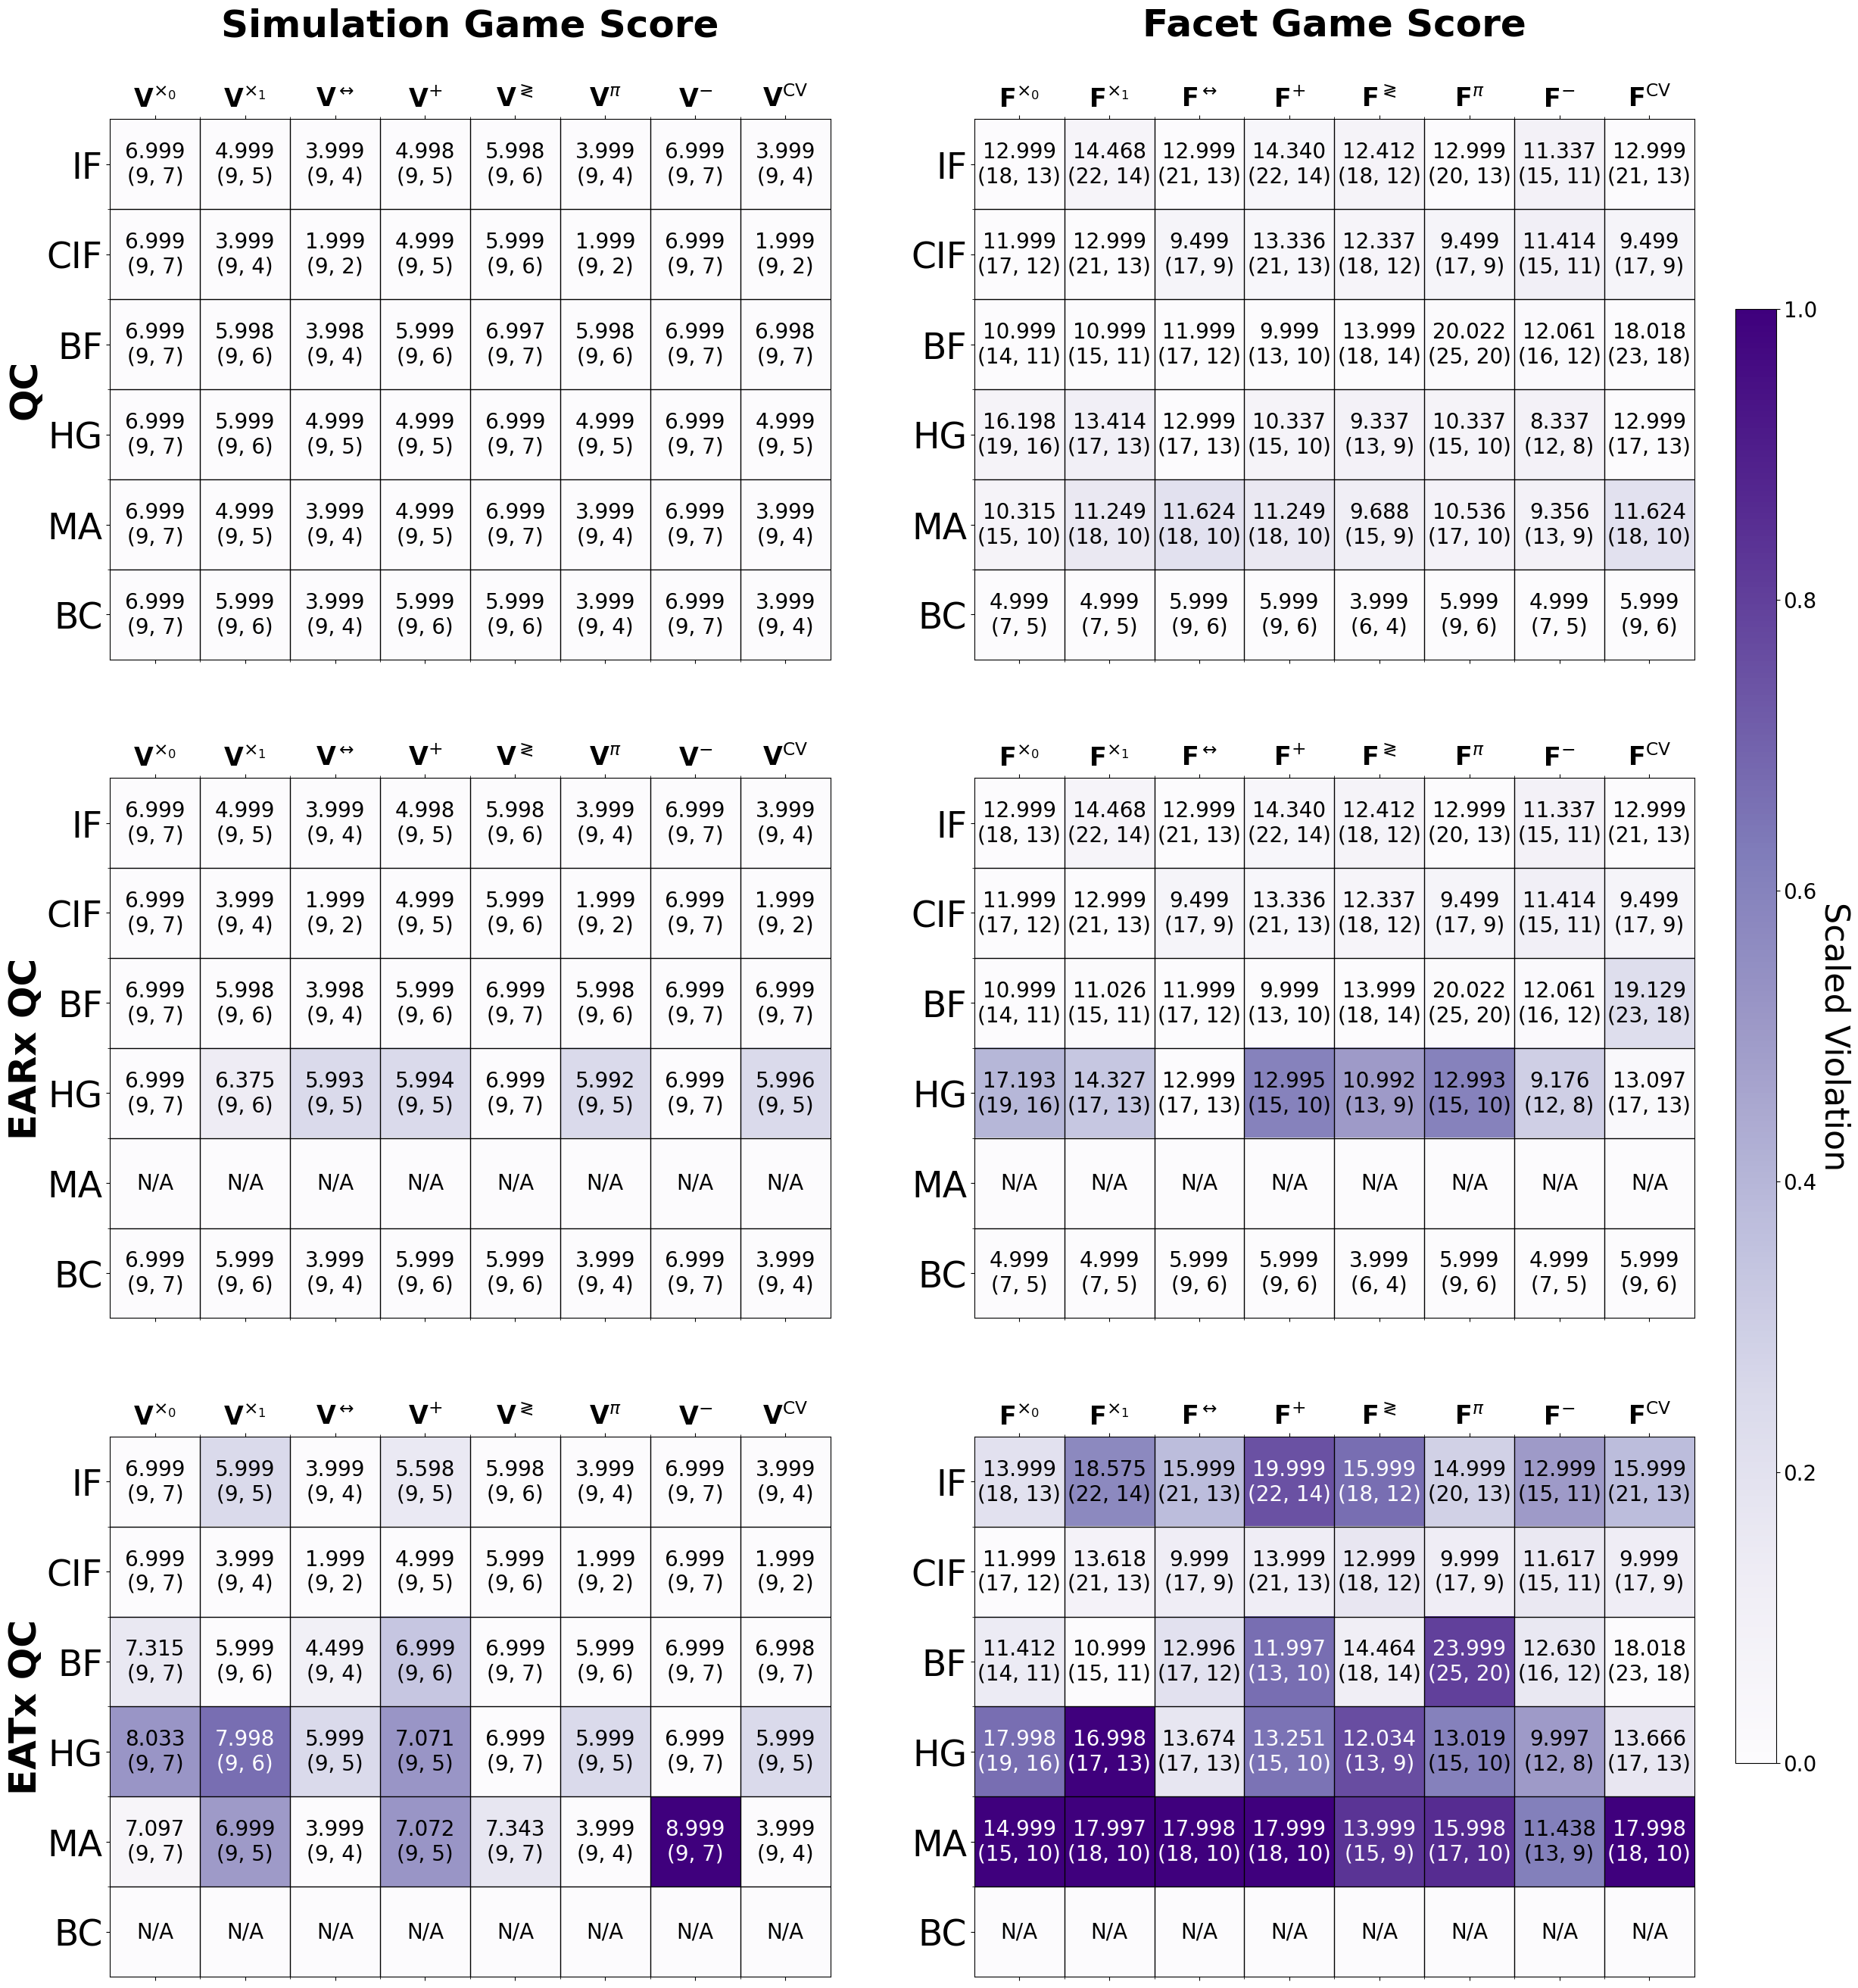

In [53]:
fig, ((qc_ax, qc_facet_ax), (earx_qc_ax, earx_qc_facet_ax), (eatx_qc_ax, eatx_qc_facet_ax) ) = plt.subplots(nrows=3, ncols=2, figsize=(27,32))

# fig.suptitle(r"Violations of Classicality in $33\to 33$" + " Multipoint Communication Networks", size=42)

multiaccess_row = [index for index,value in enumerate(network_names) if value == "MA"][0]
broadcast_row = [index for index,value in enumerate(network_names) if value == "BC"][0]

# game tables
cc_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[0] , row[1:])), 
    game_max_violations_table_data[1:])
))
qc_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[1] , row[1:])), 
    game_max_violations_table_data[1:])
))
earx_qc_table_data = np.maximum(qc_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[2] , row[1:])), 
    game_max_violations_table_data[1:])
)))
eatx_qc_table_data = np.maximum(qc_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[3] , row[1:])), 
    game_max_violations_table_data[1:])
)))
scaled_qc_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[1] , row[1:])), 
    scaled_game_max_violations_table_data[1:])
))
scaled_earx_qc_table_data = np.maximum(scaled_qc_table_data,  np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[2] , row[1:])), 
    scaled_game_max_violations_table_data[1:])
)))
scaled_eatx_qc_table_data = np.maximum(scaled_qc_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[3] , row[1:])), 
    scaled_game_max_violations_table_data[1:])
)))
scaled_earx_qc_table_data[multiaccess_row,:] = np.zeros(len(game_names))

# facet table
cc_facet_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[0] , row[1:])), 
    facet_max_violations_table_data[1:])
))
qc_facet_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[1] , row[1:])), 
    facet_max_violations_table_data[1:])
))
earx_qc_facet_table_data = np.maximum(qc_facet_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[2] , row[1:])), 
    facet_max_violations_table_data[1:])
)))
eatx_qc_facet_table_data = np.maximum(qc_facet_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[3] , row[1:])), 
    facet_max_violations_table_data[1:])
)))
qbound_facet_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[4] , row[1:])), 
    scaled_facet_max_violations_table_data[1:])
))
earx_qc_facet_table_data[multiaccess_row,:] = np.zeros(len(game_names))

scaled_cc_facet_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[0] , row[1:])), 
    scaled_facet_max_violations_table_data[1:])
))
scaled_qc_facet_table_data = np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[1] , row[1:])), 
    scaled_facet_max_violations_table_data[1:])
))
scaled_earx_qc_facet_table_data = np.maximum(scaled_qc_facet_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[2] , row[1:])), 
    scaled_facet_max_violations_table_data[1:])
)))
scaled_eatx_qc_facet_table_data = np.maximum(scaled_qc_facet_table_data, np.array(list(map(
    lambda row: list(map(lambda tuple: tuple[3] , row[1:])), 
    scaled_facet_max_violations_table_data[1:])
)))
scaled_earx_qc_facet_table_data[multiaccess_row,:] = np.zeros(len(game_names))

print(qbound_facet_table_data)


# color bar and plotting colored data
color_map_name = "Purples"
pcm_qc = qc_ax.matshow(scaled_qc_table_data, cmap=mpl.colormaps[color_map_name], vmax=1,vmin= 0)
pcm_earx_qc = earx_qc_ax.matshow(scaled_earx_qc_table_data, cmap=mpl.colormaps[color_map_name], vmax=1,vmin= 0)
pcm_eatx_qc = eatx_qc_ax.matshow(scaled_eatx_qc_table_data, cmap=mpl.colormaps[color_map_name], vmax=1,vmin= 0)

pcm_qc_facet = qc_facet_ax.matshow(scaled_qc_facet_table_data, cmap=mpl.colormaps[color_map_name], vmax=1,vmin= 0)
pcm_earx_qc_facet = earx_qc_facet_ax.matshow(scaled_earx_qc_facet_table_data, cmap=mpl.colormaps[color_map_name], vmax=1,vmin= 0)
pcm_eatx_qc_facet = eatx_qc_facet_ax.matshow(scaled_eatx_qc_facet_table_data, cmap=mpl.colormaps[color_map_name], vmax=1,vmin= 0)


y_tick_labels_games = list(map(lambda row: row[0], game_max_violations_table_data))
x_tick_labels_games = list(map(lambda name: name, game_max_violations_table_data[0]))

y_tick_labels_facets = list(map(lambda row: row[0], facet_max_violations_table_data))
x_tick_labels_facets = list(map(lambda name: name, facet_max_violations_table_data[0]))

game_axes = [qc_ax, earx_qc_ax, eatx_qc_ax]
facet_axes = [qc_facet_ax, earx_qc_facet_ax, eatx_qc_facet_ax]

ax_titles = ["QC", "EARx QC", "EATx QC"]
for i in range(3):
    ax_game = game_axes[i]
    ax_facet = facet_axes[i]
    ax_game.set_yticks([y + 0.5 for y in range(0, 5)], minor=True)
    ax_game.set_xticks([x + 0.5 for x in range(0, 7)], minor=True)
    ax_game.grid(which="minor", ls="-", lw=1, color="black")
    ax_game.set_xticklabels(x_tick_labels_games, fontsize=24)

    ax_game.annotate(
        ax_titles[i],
        xy=(-1.5, 0.5),
        xytext=(-ax_game.yaxis.labelpad - 12, 0),
        xycoords=ax_game.yaxis.label,
        textcoords="offset points",
        size=36,
        ha="center",
        va="center",
        rotation=90,
        fontweight="bold",
    )

    # ax_game.set_title(ax_titles[i], size=32)

    ax_game.set_yticklabels(y_tick_labels_games, fontsize=34)
    ax_facet.set_yticklabels(y_tick_labels_games, fontsize=34)

    if i == 0:  
        ax_game.set_title("Simulation Game Score\n", size=36, fontweight="bold")


    # ax_facet.set_yticklabels([])

    ax_facet.set_yticks([y + 0.5 for y in range(0, 5)], minor=True)
    ax_facet.set_xticks([x + 0.5 for x in range(0, 7)], minor=True)
    ax_facet.grid(which="minor", ls="-", lw=1, color="black")
    ax_facet.set_xticklabels(x_tick_labels_facets, fontsize=24)
    if i == 0:
        ax_facet.set_title("Facet Game Score\n", size=36, fontweight="bold")

mat_num_font=20
text_color_threshold = 0.65

import decimal
decimal.getcontext().rounding = decimal.ROUND_DOWN
n_decimals = 3

for y in range(len(cc_table_data)):
    for x in range(len(cc_table_data[0])):

        cc_val = cc_table_data[y][x]
        qc_val = qc_table_data[y][x]
        earx_val = earx_qc_table_data[y][x]
        eatx_val = eatx_qc_table_data[y][x]
        scaled_qc_val = scaled_qc_table_data[y][x]
        scaled_earx_val = scaled_earx_qc_table_data[y][x]
        scaled_eatx_val = scaled_eatx_qc_table_data[y][x]

        qc_text_color = "white" if scaled_qc_val >= text_color_threshold else "black"
        earx_text_color = "white" if scaled_earx_val >= text_color_threshold else "black"
        eatx_text_color = "white" if scaled_eatx_val >= text_color_threshold else "black"

        qc_ax.text(x, y, str(round(decimal.Decimal(qc_val), n_decimals)) + "\n(" + "9, " + str(int(cc_val)) + ")",
        # qc_ax.text(x, y, '%.3f' % qc_val + "\n" + "(" + str(int(cc_val)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=qc_text_color
        )
        if y == multiaccess_row:
            earx_qc_ax.text(x, y, "N/A",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=earx_text_color,
            )
        else:
            earx_qc_ax.text(x, y, str(round(decimal.Decimal(earx_val), n_decimals)) + "\n(" + "9, " + str(int(cc_val)) + ")",
            # earx_qc_ax.text(x, y, '%.3f' % earx_val + "\n" + "(" + str(int(cc_val)) + ")",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=earx_text_color,
            )
        if y == broadcast_row:
            eatx_qc_ax.text(x, y, "N/A",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=eatx_text_color,
            )
        else:
            eatx_qc_ax.text(x, y, str(round(decimal.Decimal(eatx_val), n_decimals)) + "\n(" + "9, " + str(int(cc_val)) + ")",
            # eatx_qc_ax.text(x, y, '%.3f' % eatx_val + "\n" + "(" + str(int(cc_val)) + ")",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=eatx_text_color,
            )

for y in range(len(cc_facet_table_data)):
    for x in range(len(cc_facet_table_data[0])):

        cc_val = cc_facet_table_data[y][x]
        qc_val = qc_facet_table_data[y][x]
        earx_val = earx_qc_facet_table_data[y][x]
        qbound_val = qbound_facet_table_data[y][x]
        eatx_val = eatx_qc_facet_table_data[y][x]
        scaled_qc_val = scaled_qc_facet_table_data[y][x]
        scaled_earx_val = scaled_earx_qc_facet_table_data[y][x]
        scaled_eatx_val = scaled_eatx_qc_facet_table_data[y][x]

        qc_text_color = "white" if scaled_qc_val >= text_color_threshold else "black"
        earx_text_color = "white" if scaled_earx_val >= text_color_threshold else "black"
        eatx_text_color = "white" if scaled_eatx_val >= text_color_threshold else "black"


        qc_facet_ax.text(x, y, str(round(decimal.Decimal(qc_val), n_decimals)) + "\n(" + str(int(qbound_val)) + ", " + str(int(cc_val)) + ")",
        # qc_facet_ax.text(x, y, '%.3f' % qc_val + "\n" + "(" + str(int(cc_val)) + ")",
            horizontalalignment='center',
            verticalalignment='center',
            size=mat_num_font,
            color=qc_text_color,
        )
        if y == multiaccess_row:
            earx_qc_facet_ax.text(x, y, "N/A",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=earx_text_color,
            )
        else:
            earx_qc_facet_ax.text(x, y, str(round(decimal.Decimal(earx_val), n_decimals)) + "\n(" + str(int(qbound_val)) + ", " + str(int(cc_val)) + ")",
            # earx_qc_facet_ax.text(x, y, '%.3f' % earx_val + "\n" + "(" + str(int(cc_val)) + ")",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=earx_text_color,
            )
        if y == broadcast_row:
            eatx_qc_facet_ax.text(x, y,
                "N/A",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=eatx_text_color,
            )
        else:
            eatx_qc_facet_ax.text(x, y, str(round(decimal.Decimal(eatx_val), n_decimals)) + "\n(" + str(int(qbound_val)) + ", " +  str(int(cc_val)) + ")",
            # eatx_qc_facet_ax.text(x, y, '%.3f' % eatx_val + "\n" + "(" + str(int(cc_val)) + ")",
                horizontalalignment='center',
                verticalalignment='center',
                size=mat_num_font,
                color=eatx_text_color,
            )

cb_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(pcm_qc, cax=cb_ax)
cbar.ax.set_ylabel('Scaled Violation', rotation=270, size=32, labelpad=32)
cbar.ax.tick_params(labelsize=mat_num_font)

